# Kevin Jin
kj2431 - Homework 2

# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
%matplotlib inline

df = pd.read_csv('../data/hw2data.csv')
size = len(df)
df.head() 


,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,y
0,0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,...,0.178793,-0.799422,0.240788,0.289121,0.412871,-0.198399,0.094192,-1.147611,-0.358114,-2.663126
1,0.555963,0.892474,-0.422315,0.104714,0.228053,0.201480,0.540774,-1.818078,-0.049324,0.239034,...,-0.740137,-0.565498,0.476031,-2.158069,1.318551,-0.239297,-0.246794,-1.079343,-0.114226,10.399650
2,0.013240,-0.121945,0.339059,-0.589632,-0.895816,0.548328,0.098667,0.197181,1.059027,-1.022564,...,-0.739936,1.315138,-0.323457,0.197828,0.097751,1.401523,0.158434,-1.141901,-1.310970,-21.762801
3,-1.532921,-1.711970,0.046135,-0.958374,-0.080812,-0.703859,-0.770784,-0.480845,0.703586,0.929145,...,0.473488,1.855246,1.415656,-0.302746,0.989679,0.585851,1.136388,0.671617,-0.974167,2.139453
4,-1.619685,0.572627,1.902618,-0.775664,-0.188090,-1.035748,1.177830,-2.305167,-2.263660,0.375020,...,-1.303220,0.466751,0.161106,0.320032,2.079177,-0.907466,-0.192404,-1.212516,-0.080599,0.194017


b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
y = df['y']
X = df.iloc[:, 0:500]
X1 = preprocessing.scale(X) #standardizes the data for better results

#split into testing and training datasets with train_test_split as recommended 
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=42)


c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

D:\python_Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.001


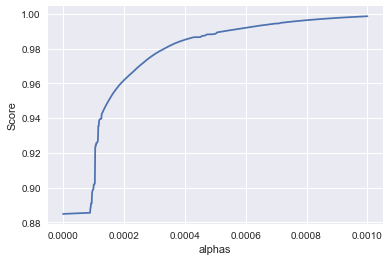

In [3]:
from sklearn.linear_model import Lasso
alphas = np.logspace(-8,-3,1000)
scores = []
train_errors = []
test_errors = []
coeffs=[]

for i in alphas:
    regr = Lasso(alpha = i)
    regr.fit(X_train,y_train)
    scores.append(regr.score(X_test,y_test))
    train_errors.append(regr.score(X_train,y_train))
    coeffs.append(regr.coef_)
test_errors = scores
plt.plot(alphas,scores)
plt.xlabel('alphas')
plt.ylabel('Score')
best_alpha = alphas[np.argmax(scores)]
print(best_alpha)

- Alpha does not seem to converge with the range given. Therefore, the range for alpha below is adjusted to a range of $10^{-8}$ to $10^{-2}$.

D:\python_Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.0014627333562


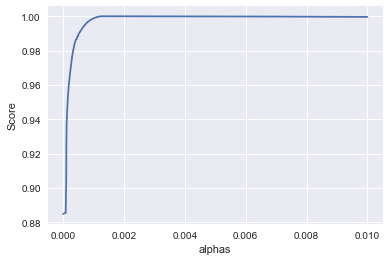

In [4]:
from sklearn.linear_model import Lasso
alphas = np.logspace(-8,-2,1000)
scores = []
train_errors = []
test_errors = []
coeffs=[]

for i in alphas:
    regr = Lasso(alpha = i)
    regr.fit(X_train,y_train)
    scores.append(regr.score(X_test,y_test))
    train_errors.append(regr.score(X_train,y_train))
    coeffs.append(regr.coef_)
test_errors = scores
plt.plot(alphas,scores)
plt.xlabel('alphas')
plt.ylabel('Score')
best_alpha = alphas[np.argmax(scores)]
print(best_alpha)

- In the plot above, it can be seen that the best alpha value is at 0.00146

d) Plot the training perforamnce versus the testing performance, and observe where the test performance is
maximized. I've written an outline of the code you need. 

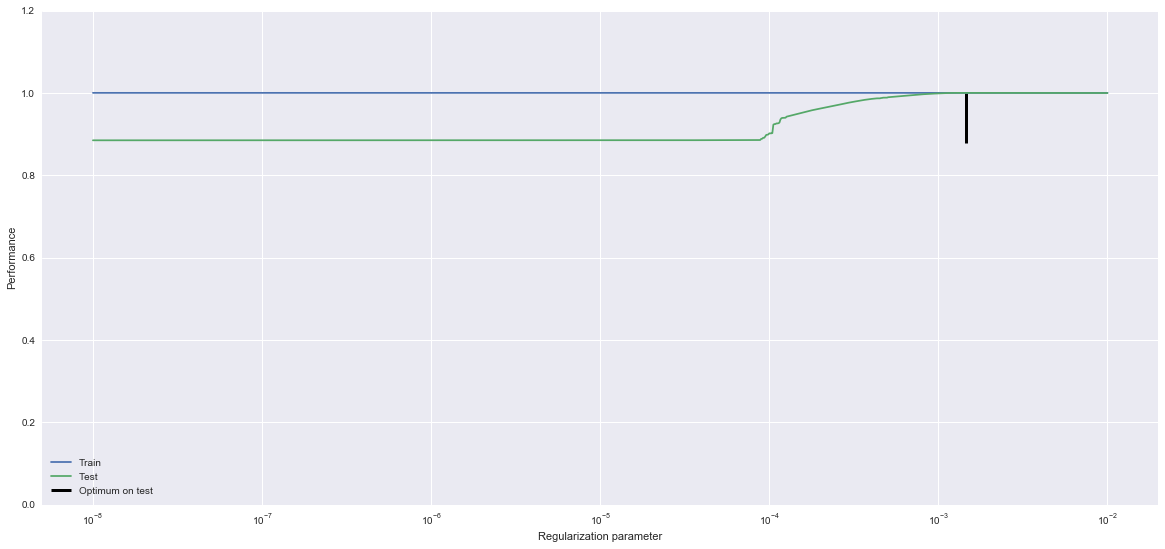

In [5]:
plt.figure(figsize=(20,20))
plt.subplot(2, 1, 1)

alpha_optim = best_alpha

#given code:
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')


plt.show()


- In the plot above, it can be confirmed that the optimum regularization parameter is at the best alpha value that was chosen above. This is because the value is closest to 1.

e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

In [6]:
regr1 = Lasso(alpha = alpha_optim)
regr1.fit(X_train,y_train)
Lasso_coef = regr1.coef_
d = {'coefficient_order':range(len(Lasso_coef)), 'value':Lasso_coef}

#multiplies by negative 1 to show positive values instead of the negative values
Lasso_coef = pd.DataFrame(data=d)
Lasso_coef = Lasso_coef.sort_values(['value'], ascending=False)


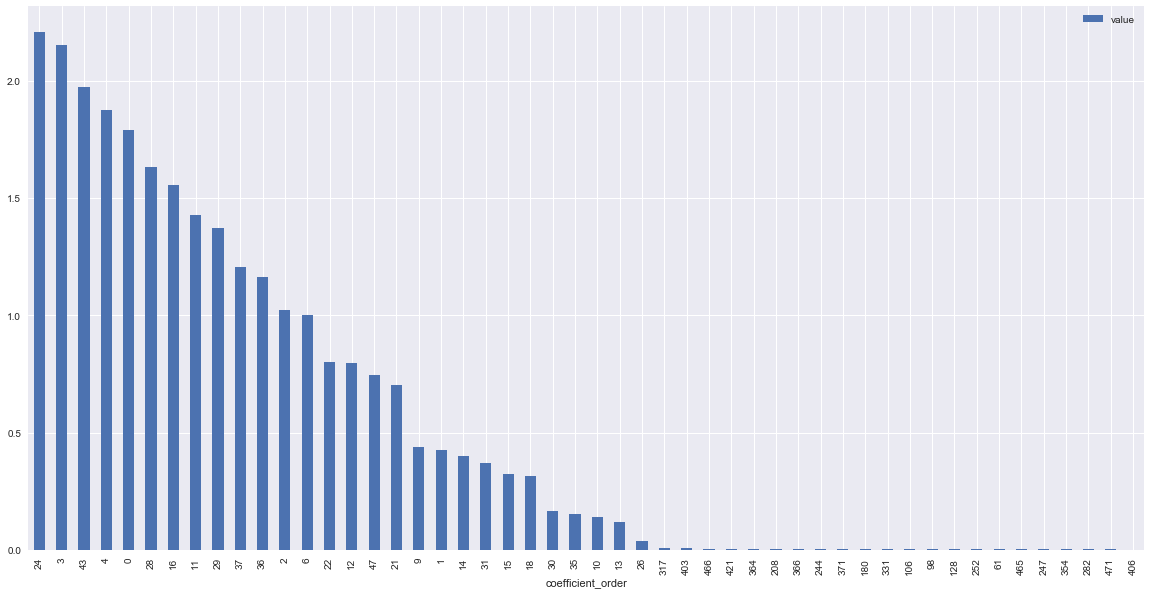

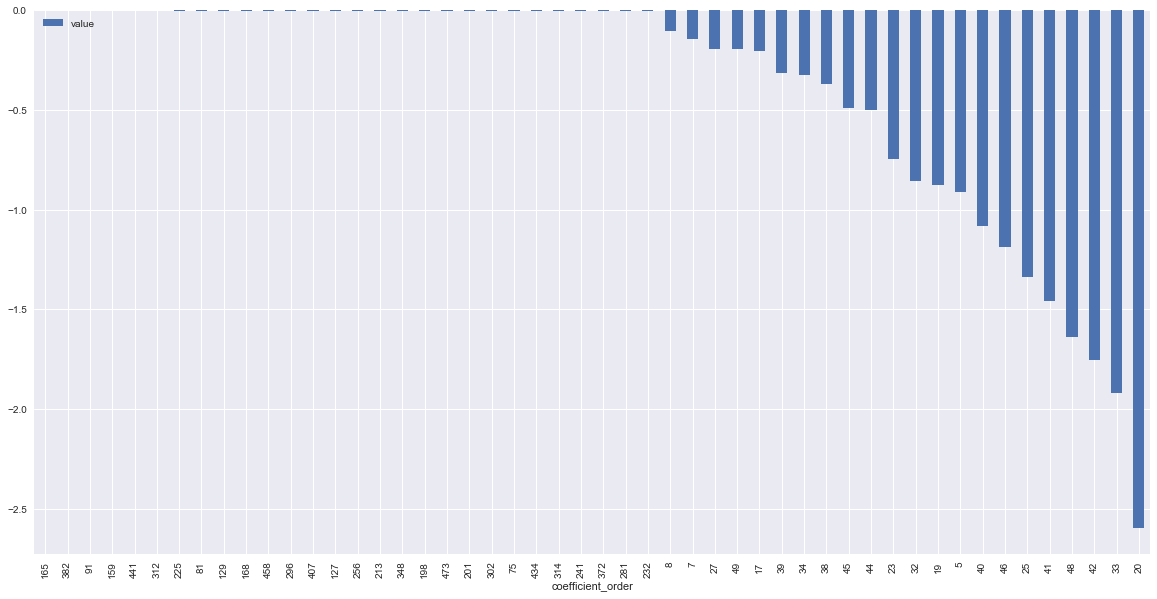

In [7]:
Lasso_coef[0:50].plot(x='coefficient_order',y='value',kind='bar',figsize=(20,10))
Lasso_coef[450:500].plot(x='coefficient_order',y='value',kind='bar',figsize=(20,10))

- The top positive and negative valued coefficients for the optimal parameter are plotted above. There are many zeros as coefficients because of the LASSO regression that was performed. This type of regression uses a $l_1$ penalty that shrinks many coefficients to 0 based on the alpha term that was previously determined. The $l_1$ norm is in the shape of squares, so when the contours of the data reach the constraint, they are shrunk to 0. If that alpha is large enough in this example, a sparse model is created. This means that there are many irrelevant features found in the dataset. 

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

[ 0.99998736  0.99999438  0.99999496  0.9999905   0.9999821 ]


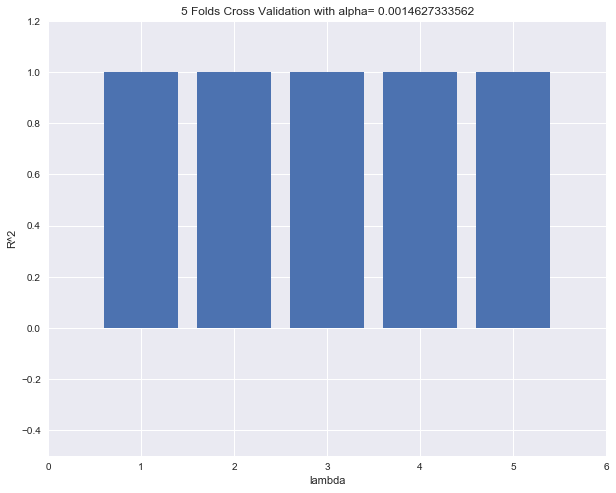

In [8]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regr1, X, y, cv=5)

plt.figure(figsize = (10,8))
plt.bar([1,2,3,4,5], score)
plt.title('5 Folds Cross Validation with alpha= %s' %(alpha_optim))
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.axis([0,6,-0.5,1.2])
print(score)

- In the figure above, it is seen that with 5 folds cross validation that the $R^{2}$ values all range from 0 to 1. Therefore, this means that the model seems to work well on all random subsets.

g) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficients obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [9]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs



scaler = preprocessing.StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)

coeffs=run_cv_coeffs(X_scaled,np.array(y),Lasso,alpha=alpha_optim)

D:\python_Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

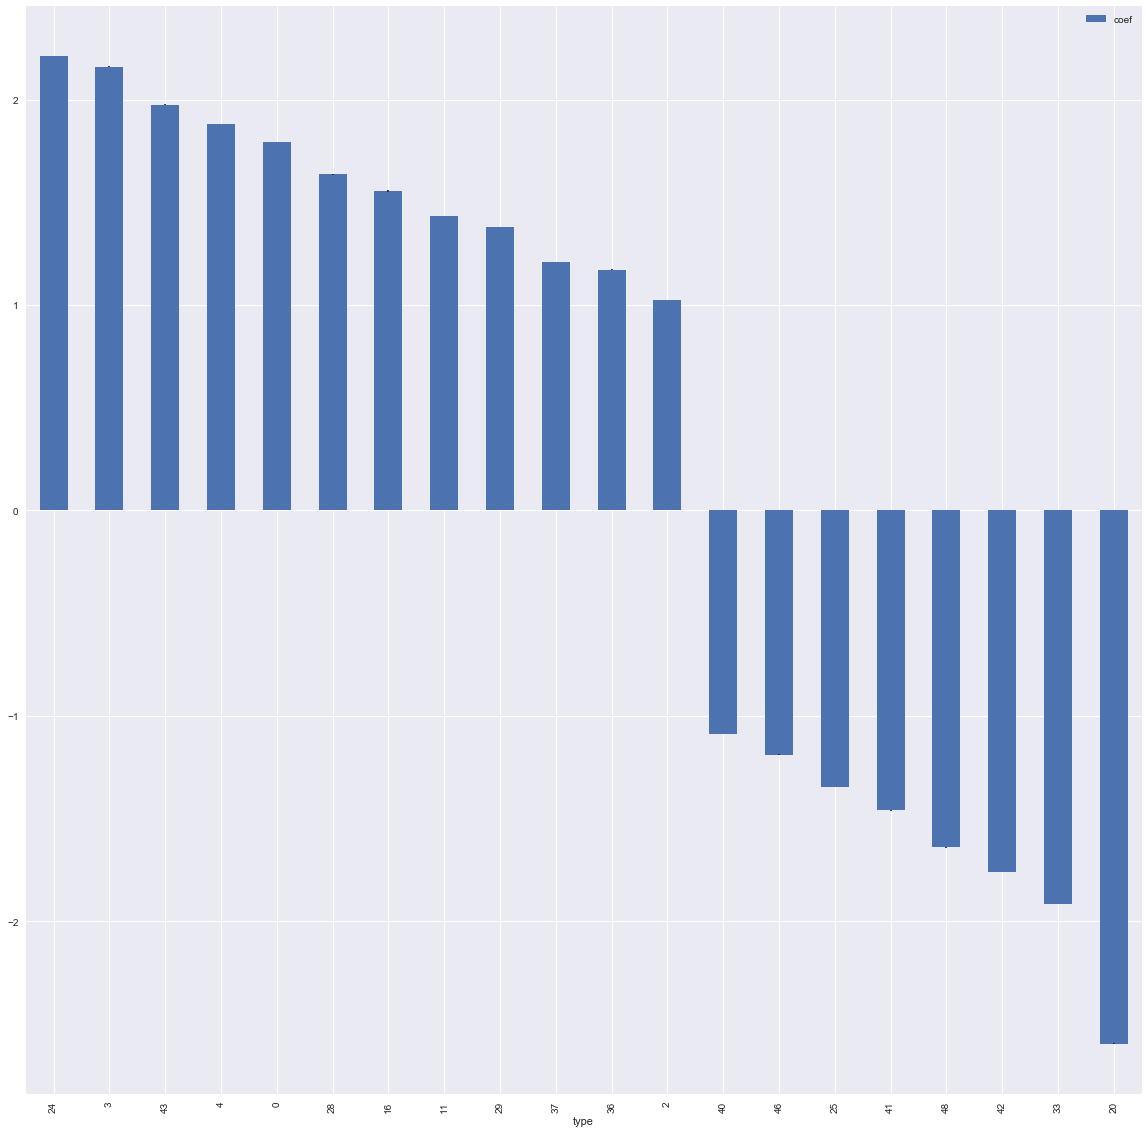

In [11]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort_values(['coef'])[::-1]
y_err_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=y_err_vals,figsize=(20,20))

- Overall, it is shown that the error bars for the optimal $\alpha$ value is very small. This means that the standard deviation of the coefficients above have little variance from the average value. Therefore, this shows that the model works well on random subsets.